# **Fraud Detection in Transactions Dataset**

https://www.kaggle.com/datasets/sahideseker/fraud-detection-in-transactions-dataset



In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('fraud_detection.csv')
df.head()

,transaction_id,amount,merchant_type,device_type,label
0,1,46.93,travel,tablet,0
1,2,301.01,groceries,desktop,0
2,3,131.67,others,tablet,0
3,4,91.29,electronics,desktop,0
4,5,16.96,others,mobile,0


In [121]:
display(df.info())
display(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  1000 non-null   int64  
 1   amount          1000 non-null   float64
 2   merchant_type   1000 non-null   object 
 3   device_type     1000 non-null   object 
 4   label           1000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


None

,0
transaction_id,0
amount,0
merchant_type,0
device_type,0
label,0


In [122]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

def normalize(df):
    # Remove ID (não usado no modelo)
    df = df.drop(columns=['transaction_id'])

    # OneHotEncoder para device_type
    encoder_device = OneHotEncoder(sparse_output=False)
    encoded_device = encoder_device.fit_transform(df[['device_type']])
    encoded_device_df = pd.DataFrame(
        encoded_device,
        columns=encoder_device.get_feature_names_out(['device_type']),
        index=df.index
    )
    df = pd.concat([df.drop(columns=['device_type']), encoded_device_df], axis=1)

    # OneHotEncoder para merchant_type
    encoder_merchant = OneHotEncoder(sparse_output=False)
    encoded_merchant = encoder_merchant.fit_transform(df[['merchant_type']])
    encoded_merchant_df = pd.DataFrame(
        encoded_merchant,
        columns=encoder_merchant.get_feature_names_out(['merchant_type']),
        index=df.index
    )
    df = pd.concat([df.drop(columns=['merchant_type']), encoded_merchant_df], axis=1)

    # Escalonamento do amount
    df['amount'] = StandardScaler().fit_transform(df[['amount']])

    return df


In [123]:
df = normalize(df)
label = df['label']
df.drop(columns=['label'],inplace=True)
df.head()

,amount,device_type_desktop,device_type_mobile,device_type_tablet,merchant_type_clothing,merchant_type_electronics,merchant_type_groceries,merchant_type_others,merchant_type_travel
0,-0.517689,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.096240,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.354101,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.061321,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.826015,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [124]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

In [125]:
from sklearn.neighbors import NearestNeighbors

def plot_k_distance(X, min_pts, title="K-Distance Plot"):
    """Plota o gráfico K-Distance usando sklearn.NearestNeighbors."""
    k = int(min_pts - 1)

    nn = NearestNeighbors(n_neighbors=k+1, metric="euclidean")
    nn.fit(X)
    distances, _ = nn.kneighbors(X)

    kth_distances = distances[:, k]
    k_distances_sorted = np.sort(kth_distances)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(k_distances_sorted)), k_distances_sorted, linewidth=2, label=f'{k}-distance')
    plt.xlabel("Pontos ordenados por distância")
    plt.ylabel(f"{k}-distance")
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

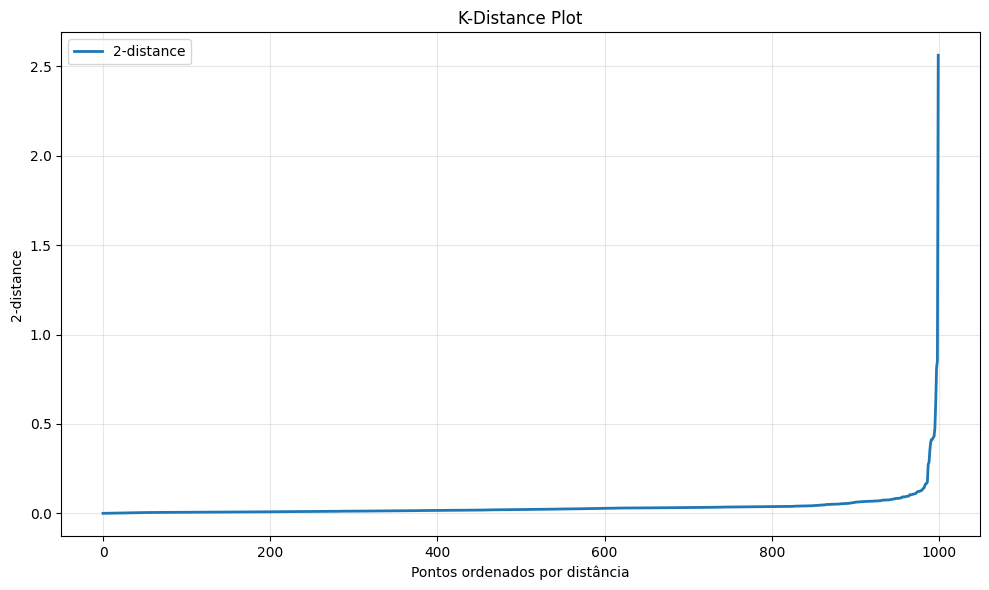

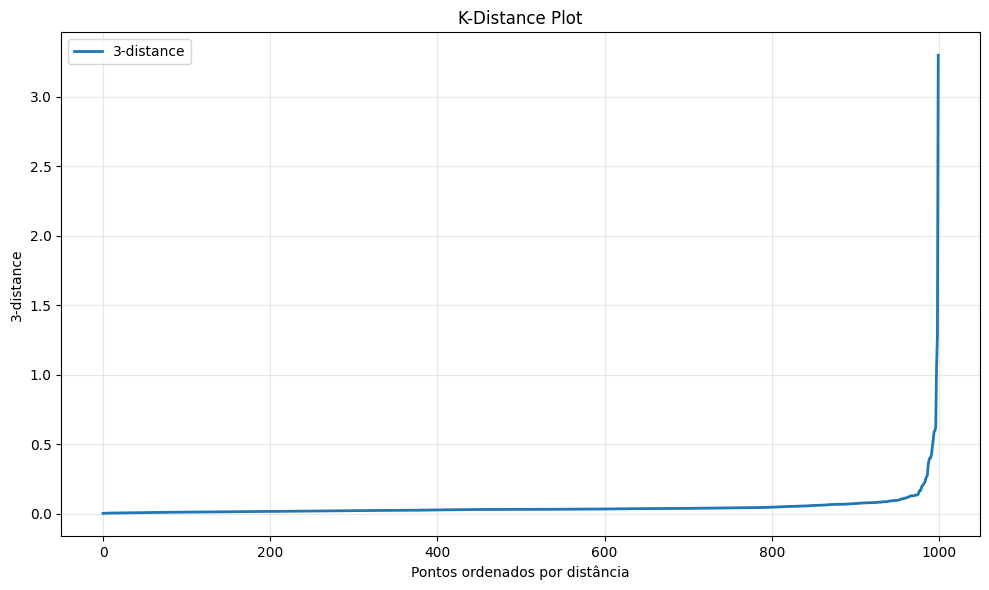

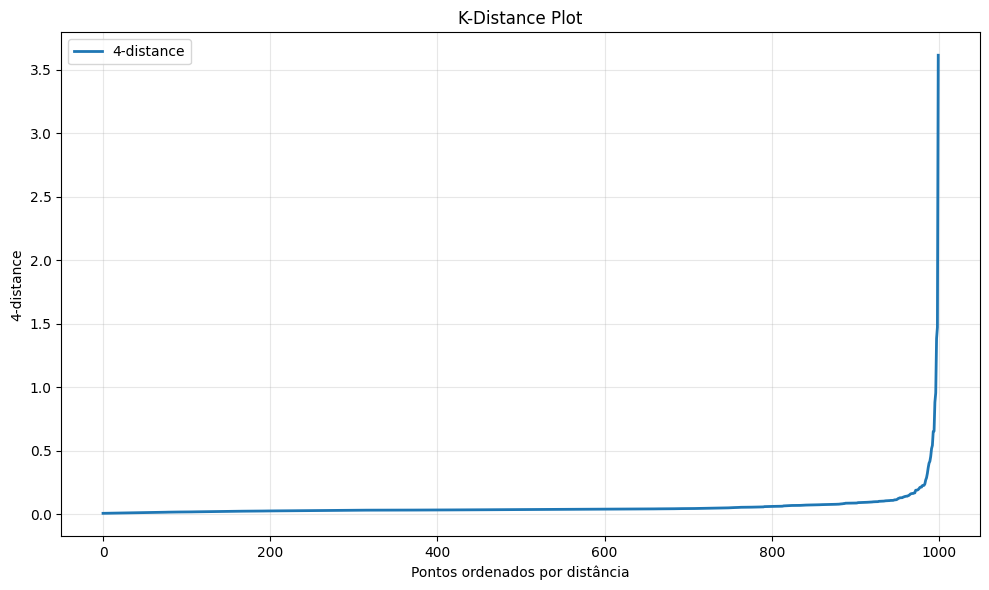

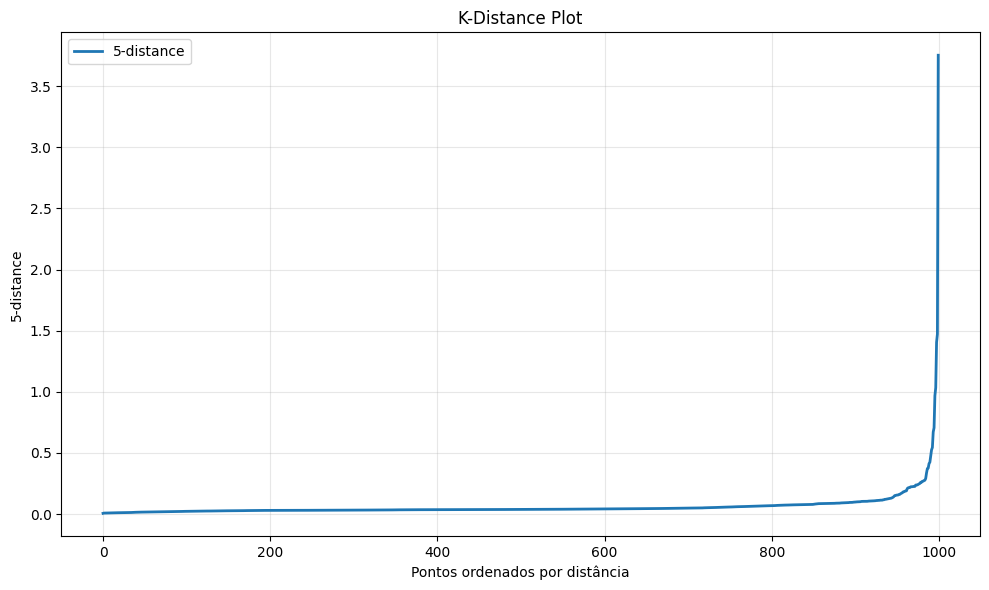

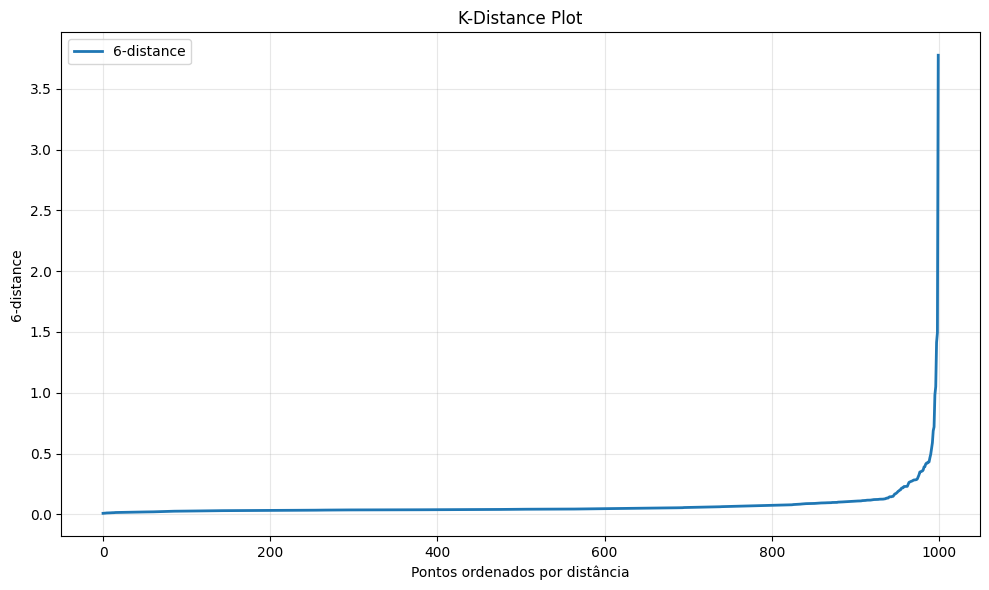

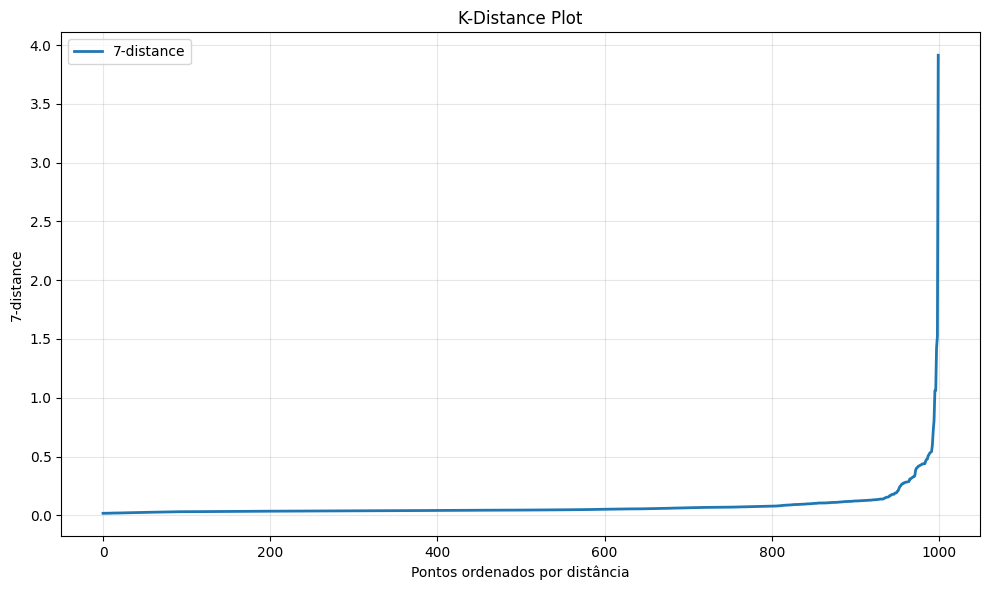

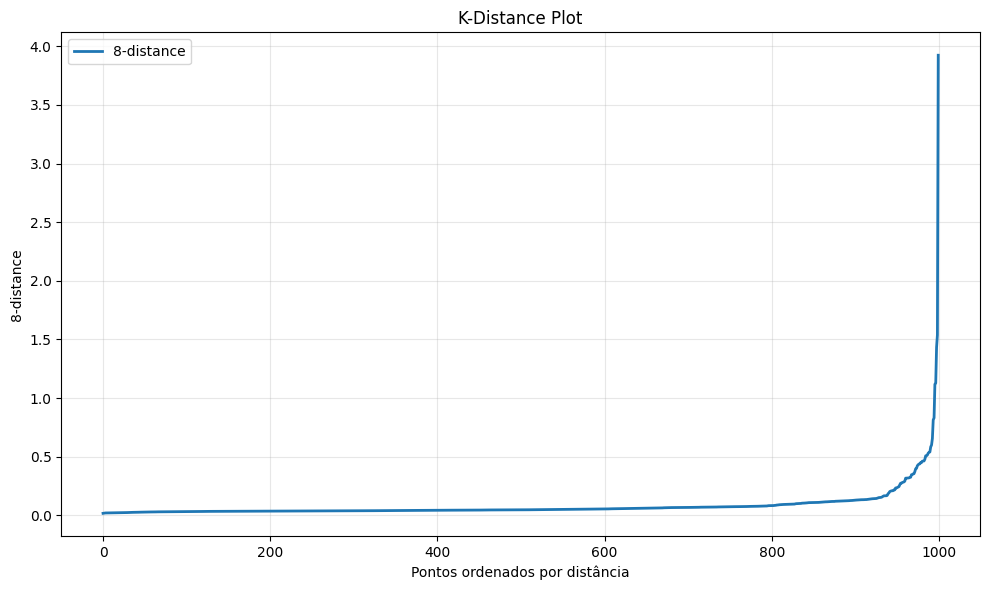

In [126]:
for k in range(3,10):
  plot_k_distance(X=X_pca,min_pts=k)

In [139]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=6)  # eps = raio do vizinho, min_samples = densidade mínima
labels = dbscan.fit_predict(X_pca)

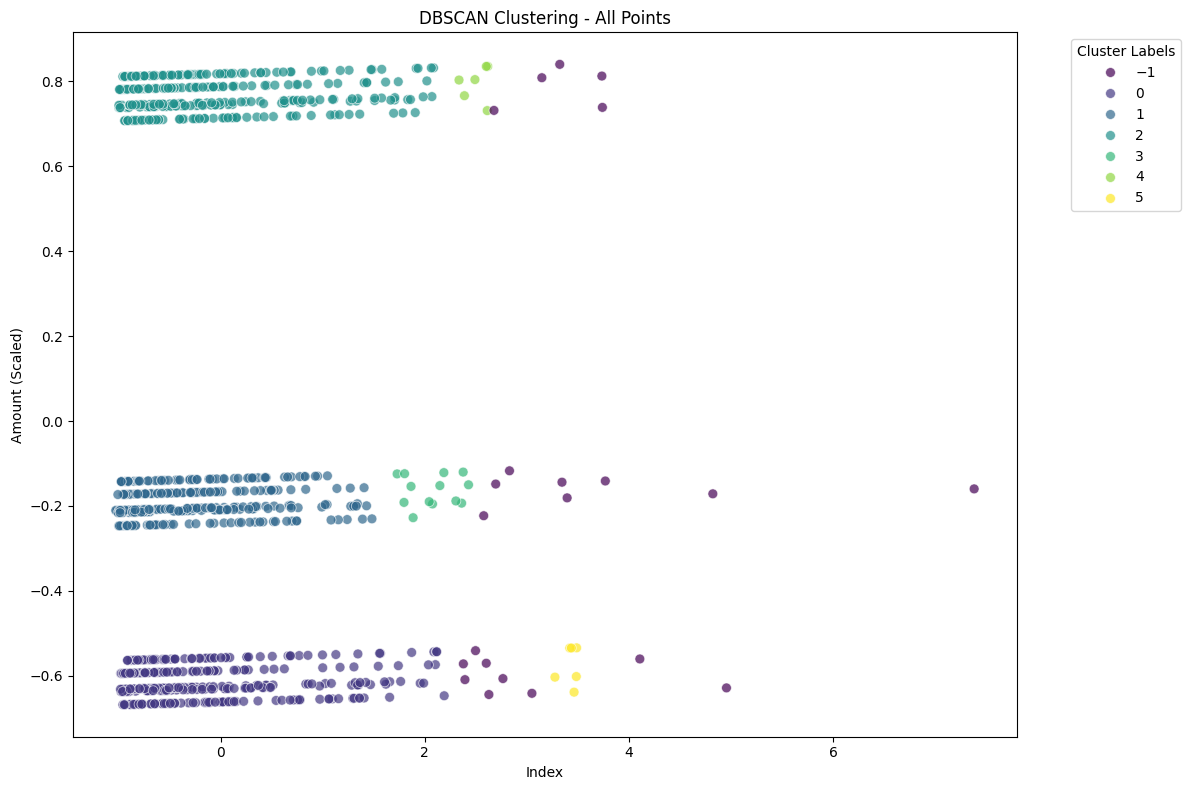

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['labels'] = labels
df_plot['label_real'] = label

df['labels'] = labels
df['label_real'] = label

# Plot all clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='labels', palette='viridis', s=50, alpha=0.7)
plt.title("DBSCAN Clustering - All Points")
plt.xlabel("Index")
plt.ylabel("Amount (Scaled)")
plt.legend(title='Cluster Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [142]:
df[df['labels'] == -1]

,amount,device_type_desktop,device_type_mobile,device_type_tablet,merchant_type_clothing,merchant_type_electronics,merchant_type_groceries,merchant_type_others,merchant_type_travel,labels,label_real
34,2.467116,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1,0
50,2.592833,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1,0
139,2.669992,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1,0
154,3.365654,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1,0
226,2.715773,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1,0
261,3.742806,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1,0
305,2.830276,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1,0
390,3.790541,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1,0
464,2.368456,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1,0
469,2.397468,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1,0
